# Análisis y replicación de gráficas sobre la ENFIH 

Encuesta Nacional sobre las Finanzas de los Hogares ([ENFIH](https://www.inegi.org.mx/programas/enfih/2019/)), replica de dos de las gráficas en la parte baja de la página 13 de la [presentación ejecutiva](https://www.inegi.org.mx/contenidos/programas/enfih/2019/doc/enfih_2019_presentacion_resultados.pdf) de la encuesta: 
    - Número de integrantes.
    - Tipo de tenencia de la vivienda.
    - Edad.
    
**Nota:** No se considera el factor de expansión, así que los datos sólo son aproximados a los que aparecen en la presentación.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
enfih = pd.read_csv('TCONCENTRADORA.csv')
enfih.columns = enfih.columns.str.lower()
enfih

,folio,viv_sel,hogar,h_ppal,sx_jefe,cat_tamhog,gpo_edad,cat_escol,cat_tncia,cat_pos,...,serv_hipo,raz_1,raz_2,raz_3,raz_4,raz_5,raz_6,edis,upm_dis,fac_hog
0,1,1,1,1,1,2,4,1,2,0,...,0,0.000000,0.000000,0.000000,0.0,0.0,0.031949,2,1,588
1,2,2,1,1,2,1,5,2,1,0,...,0,0.072202,0.317158,0.228354,0.0,0.0,0.000000,2,1,588
2,3,3,1,1,1,3,5,3,4,0,...,0,0.000000,0.000000,0.000000,0.0,0.0,0.015684,2,1,588
3,4,4,1,1,2,3,5,0,2,0,...,0,0.633333,0.086051,0.228261,0.0,0.0,0.000000,2,1,588
4,5,5,1,1,1,6,6,1,1,4,...,0,0.000000,0.000000,0.000000,0.0,0.0,0.008733,2,1,588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17760,17382,14,1,1,1,1,6,0,1,0,...,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,406,3307,893
17761,17383,16,1,1,1,2,4,1,1,4,...,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,406,3307,893
17762,17384,17,1,1,1,3,5,1,1,4,...,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,406,3307,893
17763,17385,19,1,1,1,5,3,1,1,0,...,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,406,3307,893


### Distribución porcentual de los hogares por Número de Integrantes

In [48]:
#número de Integrantes por hogar
numero_integrantes = enfih.groupby('cat_tamhog')['folio'].count() / 17765 * 100
numero_integrantes = numero_integrantes.reset_index()
numero_integrantes = numero_integrantes.iloc[:7,:]
numero_integrantes

,cat_tamhog,folio
0,1,15.198424
1,2,20.636082
2,3,20.337743
3,4,21.401632
4,5,12.913031
5,6,9.513088


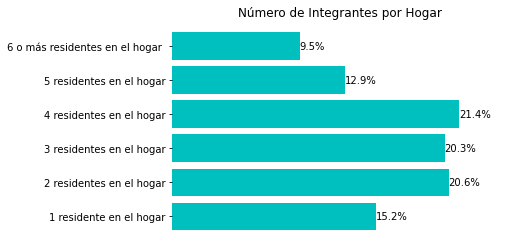

In [52]:
# Gráfico
fig, ax = plt.subplots()
bars = ax.barh(numero_integrantes['cat_tamhog'], numero_integrantes['folio'], color = 'c')
lab = ax.bar_label(bars, fmt = '%.1f%%')
ax.set_xlim([0, 25])
ax.set_xticks([])
ax.set_yticks([1, 2, 3, 4, 5, 6])
ax.set_yticklabels(['1 residente en el hogar', '2 residentes en el hogar', '3 residentes en el hogar', '4 residentes en el hogar', '5 residentes en el hogar', '6 o más residentes en el hogar '])
ax.set_title('Número de Integrantes por Hogar')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

### Distribución porcentual de los hogares por Tipo de Tenencia de la Vivienda.

In [7]:
# Tipo de Tenencia
tenencia = enfih.groupby('cat_tncia')['folio'].count() / 17765 * 100
tenencia = tenencia.reset_index()
tenencia = tenencia.iloc[:5,:]
tenencia

,cat_tncia,folio
0,0,2.133408
1,1,52.648466
2,2,13.104419
3,3,15.614973
4,4,16.498733


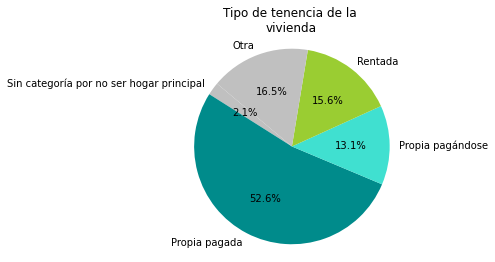

In [26]:
# Gráfico
categorias = tenencia['cat_tncia']
folio = tenencia['folio']
colores = ['silver', 'darkcyan', 'turquoise', 'yellowgreen', 'silver']
etiquetas = ['Sin categoría por no ser hogar principal', 'Propia pagada', 'Propia pagándose', 'Rentada', 'Otra']

plt.pie(folio, labels = etiquetas, colors = colores, autopct = '%1.1f%%', startangle = 140)
plt.title('Tipo de tenencia de la \nvivienda')
plt.axis('equal')
plt.show()